# Conexão com o data lake s3

In [1]:
import s3fs
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#Leitura dos dados localmente

df_total = pd.read_csv('../datas/dados_base.csv')

 #Ajustar os tipos de colunas
df_total['Date'] = pd.to_datetime(df_total['Date'])
df_total['Close'] = df_total['Close'].astype(float)
df_total['High'] = df_total['High'].astype(float)
df_total['Low'] = df_total['Low'].astype(float)
df_total['Open'] = df_total['Open'].astype(float)
df_total['Volume'] = df_total['Volume'].astype(int)
df_total['ticker'] = df_total['ticker'].astype(str)


In [ ]:

#bucket_name = 'fiap-tch3-mlet'
#prefix = 'dados_financeiros/'

In [ ]:
# Inicializa o sistema de arquivos S3
#fs = s3fs.S3FileSystem()

# Lista todos os arquivos Parquet dentro do prefixo
#arquivos = fs.glob(f'{bucket_name}/{prefix}**/dados.parquet')
#print(f"Arquivos encontrados: {len(arquivos)}")

Arquivos encontrados: 133


In [ ]:
# Agora, carrega todos os arquivos e junta
#dfs = []

#for arquivo in arquivos:
#    print(f"Lendo {arquivo}...")

    # Abrir o arquivo
#    with fs.open(arquivo) as f:
#        table = pq.read_table(f)
#        df_temp = table.to_pandas()  # Sem types_mapper aqui

    # Agora, converte a coluna 'ticker' para string
#    if 'ticker' in df_temp.columns:
#        df_temp['ticker'] = df_temp['ticker'].astype(str)

 #   dfs.append(df_temp)

Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2007/dados.parquet...
Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2008/dados.parquet...
Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2009/dados.parquet...
Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2010/dados.parquet...
Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2011/dados.parquet...
Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2012/dados.parquet...
Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2013/dados.parquet...
Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2014/dados.parquet...
Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2015/dados.parquet...
Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2016/dados.parquet...
Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2017/dados.parquet...
Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2018/dados.parquet...
Lendo fiap-tch3-mlet/dados_financeiros/ticker=AAPL/year=2019/dad

In [ ]:
#df_total = pd.concat(dfs, ignore_index=True)
#print(df_total.head())

        Date     Close      High       Low      Open      Volume ticker
0 2007-01-03  2.521843  2.605503  2.464665  2.596776  1238319600   AAPL
1 2007-01-04  2.577819  2.586546  2.522446  2.529368   847260400   AAPL
2 2007-01-05  2.559461  2.594068  2.539900  2.581128   834741600   AAPL
3 2007-01-08  2.572100  2.604000  2.566382  2.586846   797106800   AAPL
4 2007-01-09  2.785763  2.798101  2.562469  2.601591  3349298400   AAPL


## Análise Exploratória

In [3]:
#Checando os tipos de dados
print(df_total.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32326 entries, 0 to 32325
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    32326 non-null  datetime64[ns]
 1   Close   32326 non-null  float64       
 2   High    32326 non-null  float64       
 3   Low     32326 non-null  float64       
 4   Open    32326 non-null  float64       
 5   Volume  32326 non-null  int64         
 6   ticker  32326 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.7+ MB
None


In [4]:
#Estatísticas descritivas
print(df_total.describe())

                                Date         Close          High  \
count                          32326  32326.000000  32326.000000   
mean   2016-03-04 10:23:38.796015616    449.691991    452.674231   
min              2007-01-03 00:00:00      1.751500      1.853500   
25%              2011-08-02 00:00:00     21.819801     22.008204   
50%              2016-03-05 12:00:00     88.427177     89.395940   
75%              2020-10-05 00:00:00    199.564163    202.150816   
max              2025-05-09 00:00:00   6144.149902   6147.430176   
std                              NaN   1001.555496   1006.823362   

                Low          Open        Volume  
count  32326.000000  32326.000000  3.232600e+04  
mean     446.354449    449.593160  6.637759e+08  
min        1.734000      1.764500  1.584340e+05  
25%       21.619352     21.795858  1.577933e+07  
50%       87.429501     88.460013  5.010205e+07  
75%      197.057507    199.788109  1.675660e+08  
max     6111.149902   6134.500000  1.

Engenharia de Features para séries temporais financeiras

Carregamento e filtro dos dados
Selecionar apenas um ticker para análise (ex: AAPL) e garantir que os dados estejam ordenados corretamente no tempo.

In [6]:
# Filtrar apenas o ticker AAPL
df_aapl = df_total[df_total['ticker'] == 'AAPL'].copy()

# Garantir que a coluna de data está em datetime
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])

# Ordenar por data e definir como índice
df_aapl = df_aapl.sort_values('Date').set_index('Date')


Cálculo dos retornos

Calcular o retorno percentual diário, que representa a variação de um dia para o outro.

O retorno percentual é mais informativo que o preço absoluto. É uma métrica padronizada que permite comparar ativos diferentes.

In [7]:
df_aapl['retorno_1d'] = df_aapl['Close'].pct_change()


Criação de lags (defasagens)

Incluir como features o preço de fechamento de dias anteriores — ajuda o modelo a aprender padrões temporais.

Modelos como Random Forest ou XGBoost não têm “memória” como redes neurais. Lags ajudam a suprir essa limitação.

In [8]:
df_aapl['lag_1'] = df_aapl['Close'].shift(1)
df_aapl['lag_2'] = df_aapl['Close'].shift(2)
df_aapl['lag_5'] = df_aapl['Close'].shift(5)


Médias móveis

Calcular médias dos preços em janelas de tempo (ex: 7 e 14 dias), útil para suavizar variações e capturar tendências.

In [9]:
df_aapl['sma_7'] = df_aapl['Close'].rolling(window=7).mean()
df_aapl['sma_14'] = df_aapl['Close'].rolling(window=14).mean()


Volatilidade

Medir a volatilidade de curto prazo, com base no desvio padrão dos retornos diários.

A volatilidade é uma medida de risco. Alta volatilidade pode indicar maior imprevisibilidade.


In [10]:
df_aapl['volatilidade_7'] = df_aapl['retorno_1d'].rolling(window=7).std()


RSI (Índice de Força Relativa)

Incluir o RSI, um indicador técnico que mostra se um ativo está “sobrecomprado” ou “sobrevendido”.

RSI varia entre 0 e 100. Valores acima de 70 indicam sobrecompra, abaixo de 30 indicam sobrevenda.

In [11]:
delta = df_aapl['Close'].diff()
ganhos = np.where(delta > 0, delta, 0)
perdas = np.where(delta < 0, -delta, 0)

media_ganhos = pd.Series(ganhos, index=df_aapl.index).rolling(window=14).mean()
media_perdas = pd.Series(perdas, index=df_aapl.index).rolling(window=14).mean()

rs = media_ganhos / (media_perdas + 1e-10)
df_aapl['rsi_14'] = 100 - (100 / (1 + rs))


Criação da variável target

Gerar a variável que queremos prever — neste caso, o preço de fechamento do próximo dia.

O modelo vai aprender a prever o valor de Close no dia seguinte com base nas variáveis atuais.

In [12]:
df_aapl['target'] = df_aapl['Close'].shift(-1)


In [13]:
df_aapl.head()
df_modelo = df_aapl.dropna().copy()

In [14]:
df_modelo.head()

,Close,High,Low,Open,Volume,ticker,retorno_1d,lag_1,lag_2,lag_5,sma_7,sma_14,volatilidade_7,rsi_14,target
Date,,,,,,,,,,,,,,,
2007-01-23,2.579020,2.633490,2.573303,2.579923,1207424400,AAPL,-0.012560,2.611824,2.663282,2.922089,2.737356,2.712895,0.025999,53.096401,2.609114
2007-01-24,2.609114,2.622656,2.590456,2.608512,927813600,AAPL,0.011669,2.579020,2.611824,2.857387,2.703308,2.719128,0.027991,54.576965,2.595573
2007-01-25,2.595573,2.663283,2.588952,2.621453,905973600,AAPL,-0.005190,2.609114,2.579020,2.680437,2.656662,2.720397,0.022885,50.974523,2.569392
2007-01-26,2.569392,2.629278,2.557655,2.621453,986874000,AAPL,-0.010087,2.595573,2.609114,2.663282,2.615520,2.721106,0.022848,50.540462,2.586245
2007-01-29,2.586245,2.607611,2.573906,2.597078,901664400,AAPL,0.006559,2.569392,2.595573,2.611824,2.602064,2.722116,0.010813,50.766230,2.574507


## Modelagem

Separação treino/teste (base temporal)

Modelo 1 – ARIMA (modelo univariado de série temporal)

Modelo 2 – Random Forest (modelo supervisionado com múltiplas features)

Modelo 3 – XGBoost (modelo gradient boosting com múltiplas features)

Avaliação e comparação de desempenho

### ARIMA

In [15]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Usamos apenas a coluna Close para ARIMA
serie_close = df_modelo['Close']

# Separação temporal (80% treino, 20% teste)
n_total = len(serie_close)
n_treino = int(n_total * 0.8)

treino_arima = serie_close.iloc[:n_treino]
teste_arima = serie_close.iloc[n_treino:]

# Ajuste do modelo ARIMA
# Parâmetros p,d,q escolhidos manualmente para exemplo (p=5, d=1, q=0)
modelo_arima = sm.tsa.ARIMA(treino_arima, order=(5, 1, 0))
modelo_ajustado = modelo_arima.fit()

# Previsão para o período de teste
previsoes_arima = modelo_ajustado.forecast(steps=len(teste_arima))

# Cálculo do RMSE
rmse_arima = np.sqrt(mean_squared_error(teste_arima, previsoes_arima))

# dataframe com resultados
df_result_arima = teste_arima.to_frame(name="Real")
df_result_arima["Previsto_ARIMA"] = previsoes_arima.values

print(df_result_arima.head())
print(f"RMSE (ARIMA): {rmse_arima:.4f}")



c:\Users\mahno\Git\tc_fiap_fase3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahno\Git\tc_fiap_fase3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahno\Git\tc_fiap_fase3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                  Real  Previsto_ARIMA
Date                                  
2021-09-08  152.220383      153.509436
2021-09-09  151.199753      153.588376
2021-09-10  146.194748      153.549211
2021-09-13  146.763962      153.592375
2021-09-14  145.360565      153.623659
RMSE (ARIMA): 40.5083


c:\Users\mahno\Git\tc_fiap_fase3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\mahno\Git\tc_fiap_fase3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


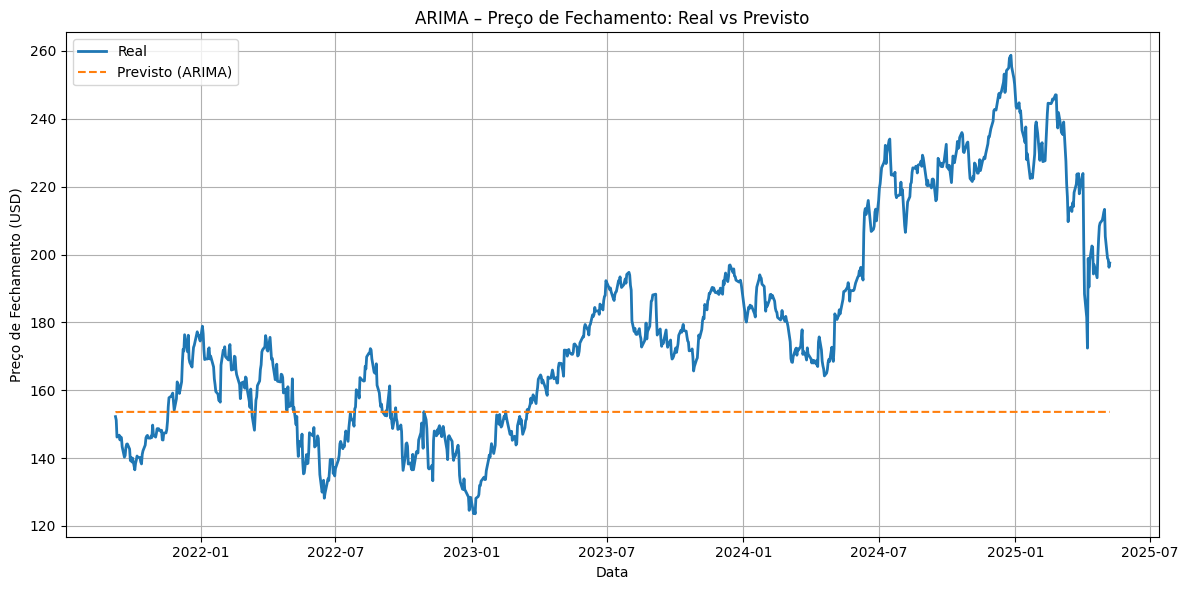

In [16]:
#Grafico com resultados do modelo

plt.figure(figsize=(12, 6))
plt.plot(teste_arima.index, teste_arima, label="Real", linewidth=2)
plt.plot(teste_arima.index, previsoes_arima, label="Previsto (ARIMA)", linestyle="--")
plt.title("ARIMA – Preço de Fechamento: Real vs Previsto")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
print("Início da série prevista:", df_result_arima.index[0])
print("Início da série real:", serie_close.index[0])


Início da série prevista: 2021-09-02 00:00:00
Início da série real: 2007-01-23 00:00:00


### Considerações Modelo ARIMA

O ARIMA é um modelo estatístico clássico para séries temporais. Ele busca capturar padrões passados para prever valores futuros com base apenas nos valores históricos da variável que está sendo modelada.

ARIMA = AutoRegressive Integrated Moving Average, que se traduz como:

AR (p): parte autorregressiva — usa valores passados (Close[t-1], Close[t-2]...).

I (d): diferença — quantas vezes subtrai o valor anterior para tornar a série estacionária.

MA (q): média móvel — modela o erro como combinação de erros anteriores.

Apesar do ARIMA ser um modelo clássico para séries temporais, ele se mostrou incapaz de capturar a complexidade e volatilidade dos preços de ações de tecnologia. A previsão ficou estacionária, mesmo diante de variações significativas. Isso reforça a necessidade de modelos mais sofisticados, como Random Forest ou XGBoost, que permitem o uso de múltiplas variáveis explicativas


Estamos usando forecast recursivo, e isso tende a propagar erro, ou seja, estamos prevendo os 20% de dados do teste de uma vez. 

Também estamos usando parâmetros fixos para p (autoregressor()), d (diferenciação) e q (média móvel) sem tuning.

Como melhoraria a performance?
- Tuning dos parametros (autoarima)
- Teste de Modelos Sazonais (sarima)
- Uso de variáveis exógenas (arimax)
- Realimentação do Modelo sempre prevendo apenas um dia a frente, porém computacionalmente mais caro

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
# Features preditoras
features = ['lag_1', 'lag_2', 'lag_5', 'sma_7', 'sma_14', 'volatilidade_7', 'rsi_14']
X = df_modelo[features]

# Target (preço de fechamento do dia seguinte)
y = df_modelo['target']



In [19]:
#Divisão treino/teste
n_total = len(df_modelo)
n_treino = int(n_total * 0.8)

X_train = X.iloc[:n_treino]
X_test = X.iloc[n_treino:]
y_train = y.iloc[:n_treino]
y_test = y.iloc[n_treino:]


In [20]:
#Treinamento do Modelo


modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
#Previsão e Avaliação
y_pred = modelo_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (Random Forest): {rmse_rf:.4f}")

RMSE (Random Forest): 41.0337


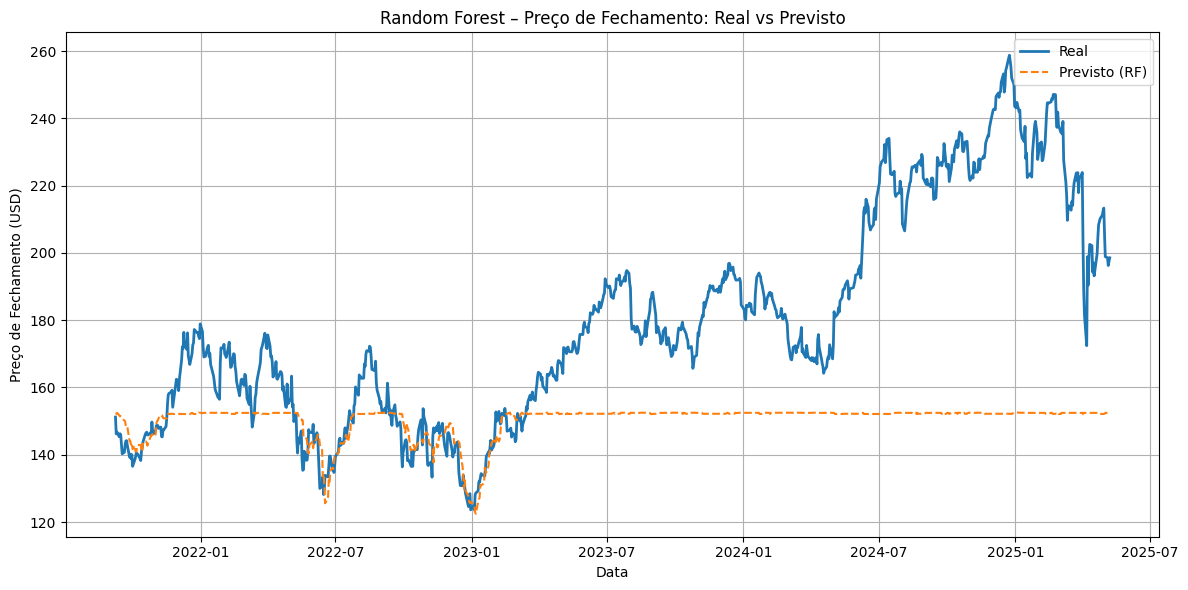

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Real", linewidth=2)
plt.plot(y_test.index, y_pred, label="Previsto (RF)", linestyle="--")
plt.title("Random Forest – Preço de Fechamento: Real vs Previsto")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Nos primeiros dias da janela de teste, o modelo teve acesso a um histórico mais recente e representativo da realidade do mercado.

O modelo aprendeu com padrões vistos no final da janela de treino.

Os dados recentes ainda tinham semelhança estatística com o que foi visto no treino.

Resultado: as primeiras previsões são melhores.

A partir de certo ponto no tempo, o comportamento do ativo muda (ex: rally de alta ou queda forte).

O modelo não foi treinado com dados que representem bem essa nova realidade.

Como o Random Forest não tem "memória", ele regride para a média das previsões mais seguras (desalinhamento temporal)

Embora o Random Forest seja robusto e útil para problemas tabulares, sua aplicação direta à previsão de preços financeiros apresenta limitações importantes. Neste caso, o modelo tendeu a prever valores médios e não conseguiu capturar a complexidade do comportamento do ativo. Isso sugere a necessidade de refinar o conjunto de variáveis preditoras, considerar a previsão de retornos em vez de preços absolutos ou, ainda, adotar modelos com maior capacidade sequencial.

In [23]:
importancia = modelo_rf.feature_importances_
for f, i in zip(features, importancia):
    print(f"{f}: {i:.4f}")

lag_1: 0.7625
lag_2: 0.1192
lag_5: 0.0012
sma_7: 0.0743
sma_14: 0.0423
volatilidade_7: 0.0002
rsi_14: 0.0002


### XGBoost

In [24]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt

features = ['lag_1', 'lag_2', 'lag_5', 'sma_7', 'sma_14', 'volatilidade_7', 'rsi_14']
target = 'target'


In [25]:
#Separaçao das variáveis
X = df_modelo[features]
y = df_modelo['target']

In [26]:
#Separação entre treino e teste

n_total = len(df_modelo)
n_treino = int(n_total * 0.8)

X_train = X.iloc[:n_treino]
X_test = X.iloc[n_treino:]
y_train = y.iloc[:n_treino]
y_test = y.iloc[n_treino:]

In [27]:
# Treinamento do modelo
modelo_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [28]:
#Previsão e avaliação
y_pred_xgb = modelo_xgb.predict(X_test)
rmse_xgb = sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"RMSE (XGBoost): {rmse_xgb:.4f}")

RMSE (XGBoost): 44.8647


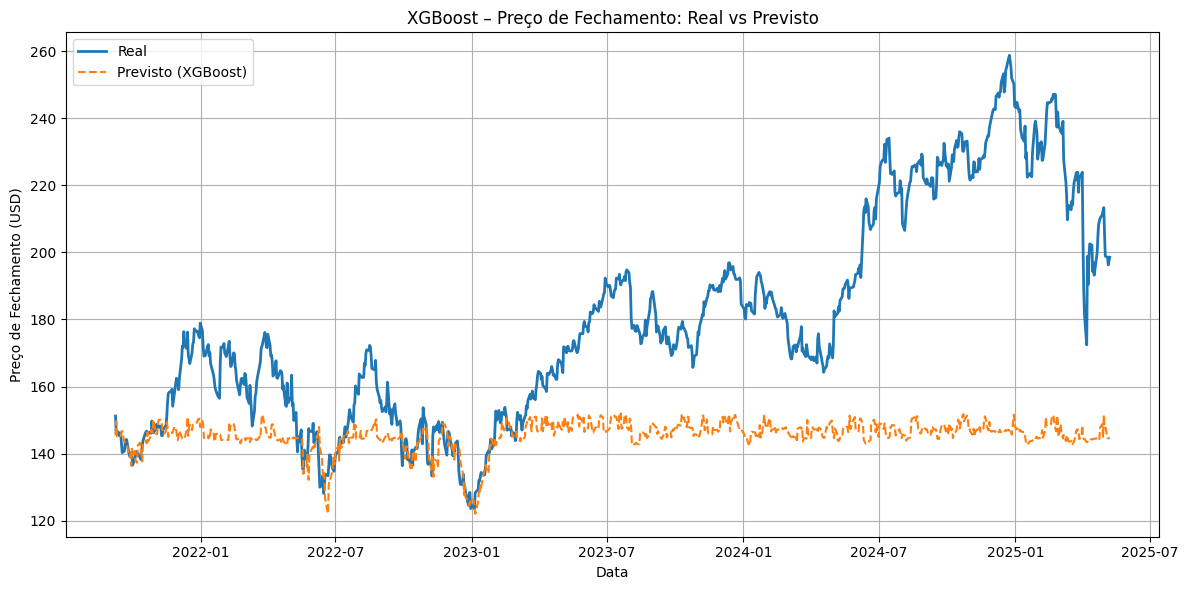

In [29]:
#Gráfico Real x Previsto

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Real", linewidth=2)
plt.plot(y_test.index, y_pred_xgb, label="Previsto (XGBoost)", linestyle="--")
plt.title("XGBoost – Preço de Fechamento: Real vs Previsto")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Embora o XGBoost ofereça vantagens em relação a modelos tradicionais, seu desempenho neste estudo mostrou-se limitado ao tentar prever diretamente o valor absoluto do preço de fechamento do dia seguinte. A curva de previsão, embora mais responsiva que Random Forest, ainda não capturou tendências relevantes do ativo. Isso indica que, para esse tipo de tarefa, pode ser mais apropriado modelar a variação percentual (retorno) ou realizar uma classificação binária (subirá ou cairá), ao invés de prever diretamente o preço.

### Modelo de previsão de Retorno

O retorno diário é uma métrica padronizada (percentual) — permite comparação entre diferentes ativos.

O preço absoluto é afetado por escala, por isso difícil de prever com precisão.

Em finanças, o que importa é quanto o ativo valorizou ou desvalorizou, e não apenas o valor nominal

In [57]:
#Nova definição da variável target
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
df_modelo['retorno_target'] = df_modelo['Close'].pct_change().shift(-1)


RMSE (retorno): 0.01937
R² (retorno): -0.11426


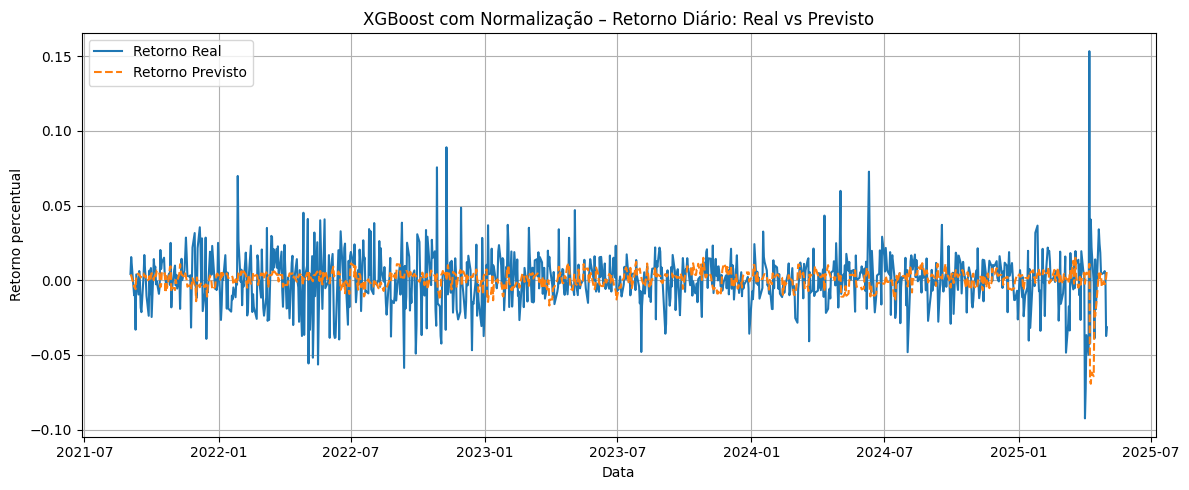

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import xgboost as xgb
import matplotlib.pyplot as plt

# =============================
# 1. Criar variável de retorno a ser prevista
# =============================
df_modelo['retorno_target'] = df_modelo['Close'].pct_change().shift(-1)
df_modelo_ret = df_modelo.dropna(subset=features + ['retorno_target'])

# =============================
# 2. Separar X e y
# =============================
X = df_modelo_ret[features]
y = df_modelo_ret['retorno_target']

# =============================
# 3. Padronizar as features
# =============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Recriar os DataFrames com índices preservados
X_scaled = pd.DataFrame(X_scaled, columns=features, index=X.index)

# =============================
# 4. Dividir em treino e teste temporal (80/20)
# =============================
n = len(X_scaled)
n_treino = int(n * 0.8)

X_train = X_scaled.iloc[:n_treino]
X_test = X_scaled.iloc[n_treino:]
y_train = y.iloc[:n_treino]
y_test = y.iloc[n_treino:]

# =============================
# 5. Treinar o modelo XGBoost
# =============================
modelo_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
modelo_xgb.fit(X_train, y_train)

# =============================
# 6. Previsão e avaliação
# =============================
y_pred = modelo_xgb.predict(X_test)
rmse_ret = sqrt(mean_squared_error(y_test, y_pred))
r2_ret = r2_score(y_test, y_pred)

print(f"RMSE (retorno): {rmse_ret:.5f}")
print(f"R² (retorno): {r2_ret:.5f}")

# =============================
# 7. Visualização
# =============================
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Retorno Real", linewidth=1.5)
plt.plot(y_test.index, y_pred, label="Retorno Previsto", linestyle='--')
plt.title("XGBoost com Normalização – Retorno Diário: Real vs Previsto")
plt.xlabel("Data")
plt.ylabel("Retorno percentual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Classíficação Binária (retorno dos proximos 5 dias positivo (1) ou negativo (0))

Filtrar os dados para 2023–2024

Criar a variável retorno_target e o target_binario

Incluir o retorno_gspc como feature

Aplicar engenharia de features (lags, RSI, etc.)

Treinar um XGBClassifier

Avaliar com métricas de classificação: acurácia, precisão, recall, matriz de confusão

In [ ]:
import yfinance as yf
import pandas as pd

# Baixar dados de exemplo
ticker = 'AAPL'
df_base = yf.download(ticker, start='2020-01-01', end='2024-12-31')

# Gerar features simples (exemplo)
df_base['lag_1'] = df_base['Close'].shift(1)
df_base['lag_2'] = df_base['Close'].shift(2)
df_base['lag_5'] = df_base['Close'].shift(5)
df_base['sma_7'] = df_base['Close'].rolling(7).mean()
df_base['sma_14'] = df_base['Close'].rolling(14).mean()
df_base['volatilidade_7'] = df_base['Close'].rolling(7).std()
df_base['retorno_gspc'] = yf.download('^GSPC', start='2020-01-01', end='2024-12-31')['Close'].pct_change()
# RSI
delta = df_base['Close'].diff()
gain = delta.clip(lower=0).rolling(14).mean()
loss = -delta.clip(upper=0).rolling(14).mean()
rs = gain / loss
df_base['rsi_14'] = 100 - (100 / (1 + rs))


c:\Users\mahno\Git\tc_fiap_fase3\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:15:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report (5d target):
              precision    recall  f1-score   support

           0       0.44      0.39      0.42       429
           1       0.52      0.57      0.54       492

    accuracy                           0.49       921
   macro avg       0.48      0.48      0.48       921
weighted avg       0.48      0.49      0.49       921

Matriz de confusão:
[[169 260]
 [211 281]]
Acurácia: 0.48859934853420195


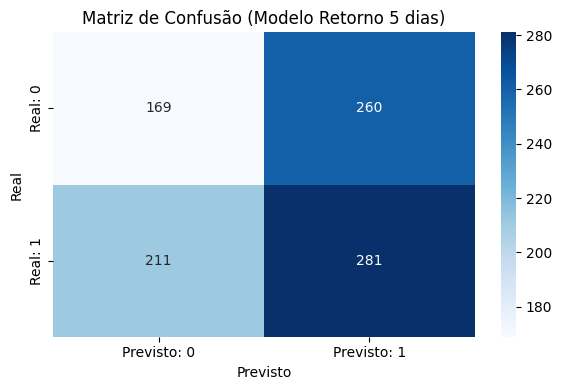

In [33]:
# =============================
# 1. Criar nova variável alvo: retorno acumulado dos próximos 5 dias
# =============================
df_aapl['retorno_5d'] = df_aapl['Close'].shift(-5) / df_aapl['Close'] - 1
df_aapl['target_binario_5d'] = (df_aapl['retorno_5d'] > 0).astype(int)

features = ['lag_1', 'lag_2', 'lag_5', 'sma_7', 'sma_14', 'volatilidade_7', 'rsi_14']
df_modelo = df_aapl.dropna(subset=features + ['target_binario_5d'])



X = df_modelo[features]
y = df_modelo['target_binario_5d']

# =============================
# 3. Normalização das features
# =============================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features, index=X.index)

# =============================
# 4. Separar treino/teste temporalmente (80/20)
# =============================
n = len(X_scaled)
n_treino = int(n * 0.8)
X_train = X_scaled.iloc[:n_treino]
X_test = X_scaled.iloc[n_treino:]
y_train = y.iloc[:n_treino]
y_test = y.iloc[n_treino:]

# =============================
# 5. Treinar o modelo
# =============================
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)

# =============================
# 6. Avaliação
# =============================
y_pred = clf.predict(X_test)

print("\nClassification Report (5d target):")
print(classification_report(y_test, y_pred))

print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))

print("Acurácia:", accuracy_score(y_test, y_pred))

# Matriz de confusão visual
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, columns=["Previsto: 0", "Previsto: 1"], index=["Real: 0", "Real: 1"])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão (Modelo Retorno 5 dias)')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.tight_layout()
plt.show()


Desempenho Geral
Acurácia: 48%
O modelo acerta menos da metade das previsões. Isso é próximo de um chute aleatório em um problema binário, o que indica que ele não está captando bem os padrões nos dados.

RETORNO POSITIVO 

Precisão: 36,8%
Quando o modelo prevê retorno positivo, ele acerta apenas 1 em cada 3 vezes.

Revocação (Recall): 51,2%
Ele consegue identificar cerca da metade dos dias com retorno positivo, ou seja, tem uma sensibilidade moderada para essa classe.

F1-score: 42,8%
Combina precisão e recall, mostrando que a performance nessa classe ainda é fraca.

RETORNO NEGATIVO 

Precisão: 53,5%
O modelo tem uma ligeira vantagem para prever dias sem retorno positivo.

Revocação: 38,9%
Acerta menos de 40% dos dias que realmente não tiveram retorno positivo.